# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [3]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [7]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [8]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [9]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [10]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [12]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [13]:
df_num_passengers_mean = df['num_passengers'].mean()
df_length_of_stay_mean = df['length_of_stay'].mean()
df_flight_hour_mean = df['flight_hour'].mean()

print(df_num_passengers_mean)
print(df_length_of_stay_mean)
print(df_flight_hour_mean)

1.59124
23.04456
9.06634


In [14]:
df['num_passengers'].count()

50000

In [15]:
flightday_count_table = pd.crosstab(index = df['flight_day'], columns='count')

flightday_count_table

col_0,count
flight_day,
1,8102
2,7673
3,7674
4,7424
5,6761
6,5812
7,6554


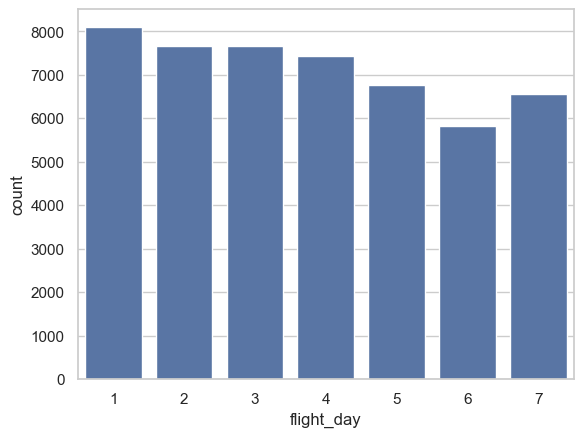

In [16]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x="flight_day", y="count", data = flightday_count_table)

In [17]:
df['booking_complete'].unique()

array([0, 1], dtype=int64)

### Random Forest 

In [19]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split

from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz


### Splitting data for training and test 

The data has been separated into features and target variables. The target variable is what I want to predict which is a customer making a booking. 

Then it has been split into training and test data. 

The algorithm will use the training data to learn the relationship between features and the target. The test data is used to evaluate the performance of the model. 

In [21]:
feature_cols = ['num_passengers','purchase_lead','length_of_stay','flight_hour','flight_day','wants_extra_baggage', 'wants_preferred_seat','wants_in_flight_meals','flight_duration']
X = df[feature_cols]               # Features of the dataset
y = df.booking_complete


print(X,y)

       num_passengers  purchase_lead  length_of_stay  flight_hour  flight_day  \
0                   2            262              19            7           6   
1                   1            112              20            3           6   
2                   2            243              22           17           3   
3                   1             96              31            4           6   
4                   2             68              22           15           3   
...               ...            ...             ...          ...         ...   
49995               2             27               6            9           6   
49996               1            111               6            4           7   
49997               1             24               6           22           6   
49998               1             15               6           11           1   
49999               1             19               6           10           4   

       wants_extra_baggage 

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)


### Fit and evaluating Random Forest algorithm 

In [24]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
# Using the predict method to make predictions on a set of test data whixh is X_test
y_pred = rf.predict(X_test)

In [26]:
# Accuracy is one of the simplest way to predict the Random Forest model. 
#It will calculate the accuracy of the model comparing the predicted values (y_pred) to the actual values (X_test).

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8442666666666667


In [27]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X_train, y_train, cv=5, scoring="accuracy")
print("Cross-validation accuracy:", np.mean(scores))


Cross-validation accuracy: 0.8477428571428571


### Visualizing the results

The colors represent the majority class of each node. The colors get darker the closer the node gets to being fully 0 (no booking) or 1 (booking). 

On each node also contains the following information:

-The variable name and value used for splitting

-Gini

-The % of total samples in each split

-The % split between classes in each split



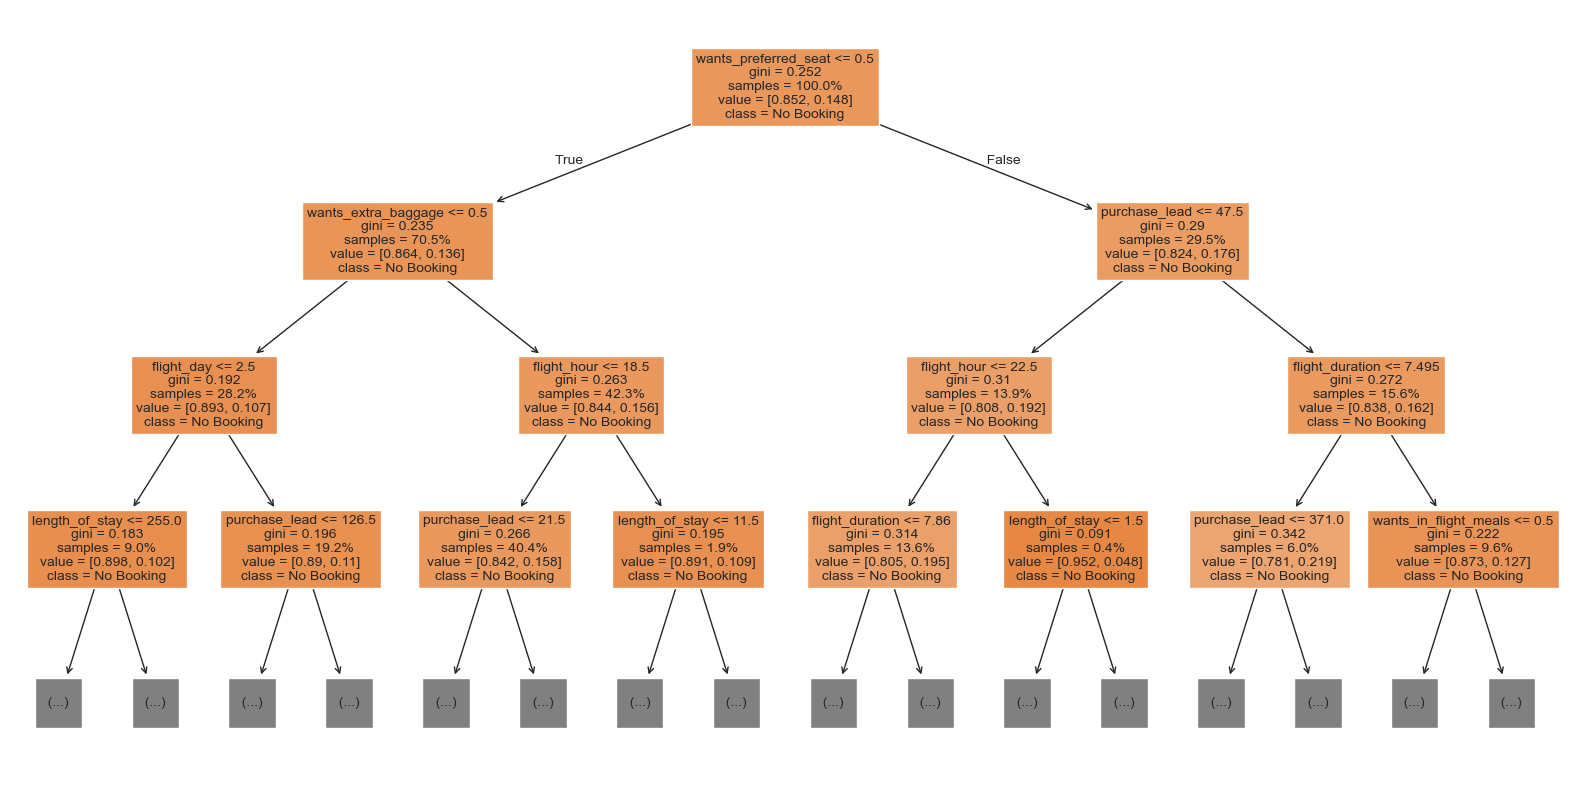

In [29]:
from sklearn.tree import plot_tree

# Pick one tree from the forest (e.g., the first)
estimator = rf.estimators_[0]

plt.figure(figsize=(20,10))
plot_tree(estimator,
          feature_names=X.columns,
          class_names=["No Booking", "Booking"],  # adjust labels to your dataset
          filled=True,
          max_depth=3,   # limit depth for readability
          fontsize=10,
          proportion=True)
plt.show()

### Hyperparameter Tuning

In order to improve model's performance we will optimize its hyperparameters using RandomizedSearchCV from Scikitlearn which will search parameters within a range per hyperparameters. The hyperparameters that has been used was: n_estimators which is the number of decision tree in the forest and max_depth which is the max_depth for each decision tree in the forest. 

In [31]:
param_dist = {'n_estimators': randint(50,500), #values randomly sampled 
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data to find the best hyperparameter
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000168331D4920>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000168331D4E90>})

In [32]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 2, 'n_estimators': 149}


### Using Confusion Matrix to evaluate Random Forest Model 




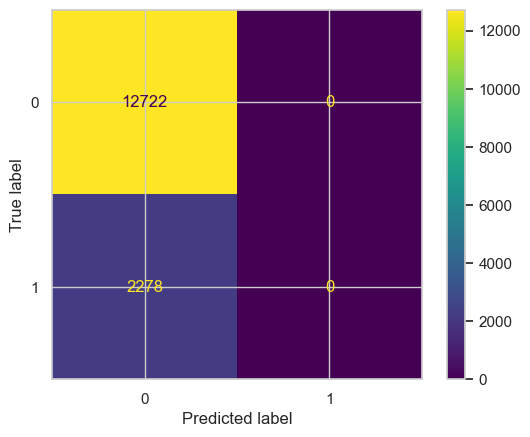

In [34]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# 1. Define the model
knn = KNeighborsClassifier(n_neighbors=5)  

# 2. Train the model
knn.fit(X_train, y_train)

# 3. Make predictions
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)   #the number of correct predictions made as a ratio of all predictions made.
precision = precision_score(y_test, y_pred) #Precision is the percentage of positive instances out of the total predicted positive instances.
recall = recall_score(y_test, y_pred)       #Recall (or sensitivity or true positive rate) is the percentage of positive instances out of the total actual positive instances.

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8316
Precision: 0.252
Recall: 0.0553116769095698


### Feature Importance Visualization

The 'flight duration' was the biggest predictor on whether the customer make a booking.



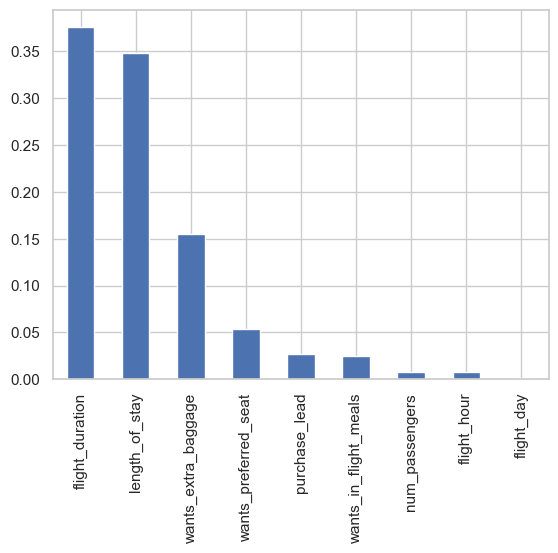

In [80]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

### Reference:
https://www.datacamp.com/tutorial/random-forests-classifier-python